In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create visualizations directory
import os
vis_dir = 'visualizations'
os.makedirs(vis_dir, exist_ok=True)
print(f"✅ Visualizations directory ready")

✅ Visualizations directory ready


In [2]:
# Load the data
# Download from: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv('Downloads/archive(2)/Mall_Customers.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (200, 5)

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Check what we have
print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics:")
df.describe()


Column names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Basic statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Basic info
print(f"\nTotal customers: {len(df)}")
print(f"\nGender distribution:")
print(df['Gender'].value_counts())

# Rename columns for easier use
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

print("\nRenamed columns:")
print(df.columns.tolist())

Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Total customers: 200

Gender distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Renamed columns:
['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']


✅ Saved: customer_distributions.png


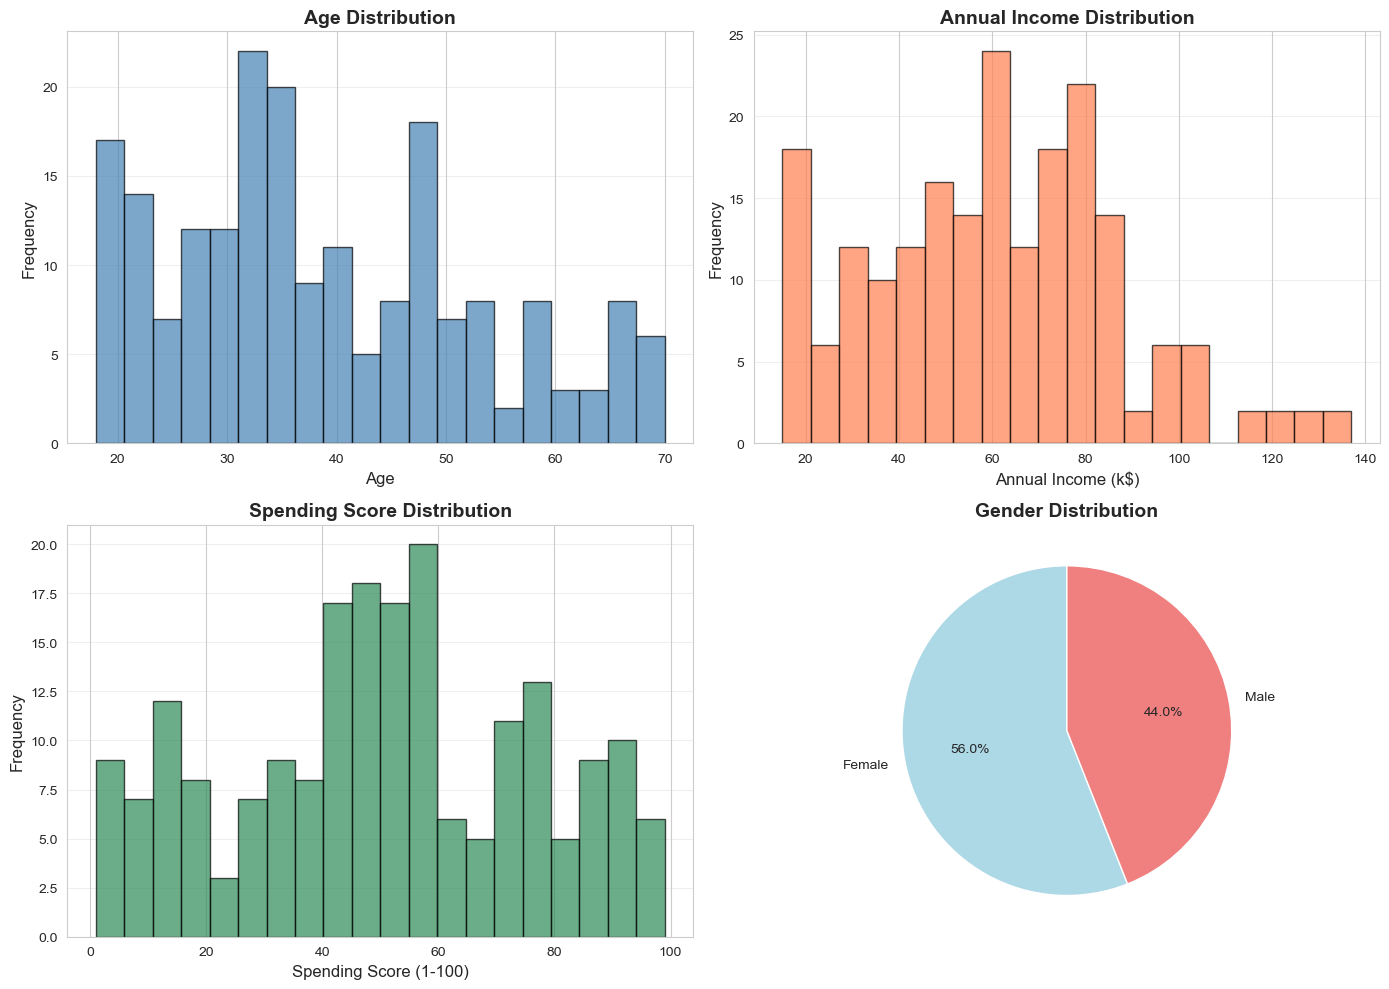

In [5]:
# Visualize distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
axes[0, 0].hist(df['Age'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# Income distribution
axes[0, 1].hist(df['AnnualIncome'], bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Spending Score distribution
axes[1, 0].hist(df['SpendingScore'], bins=20, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Spending Score (1-100)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'], startangle=90)
axes[1, 1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{vis_dir}/customer_distributions.png', dpi=300, bbox_inches='tight')
print("✅ Saved: customer_distributions.png")
plt.show()

In [6]:
# Select features for clustering
# We'll use Income and Spending Score (most relevant for segmentation)
X = df[['AnnualIncome', 'SpendingScore']].values

print(f"Features for clustering: Income and Spending Score")
print(f"Shape: {X.shape}")

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Data scaled and ready for clustering")

Features for clustering: Income and Spending Score
Shape: (200, 2)

✅ Data scaled and ready for clustering


🔍 Testing different numbers of clusters...
   K=2: Inertia=269.69, Silhouette=0.321
   K=3: Inertia=157.70, Silhouette=0.467
   K=4: Inertia=108.92, Silhouette=0.494
   K=5: Inertia=65.57, Silhouette=0.555
   K=6: Inertia=55.06, Silhouette=0.540
   K=7: Inertia=44.86, Silhouette=0.528
   K=8: Inertia=37.23, Silhouette=0.455
   K=9: Inertia=32.39, Silhouette=0.457
   K=10: Inertia=29.98, Silhouette=0.443

✅ Saved: optimal_clusters_analysis.png


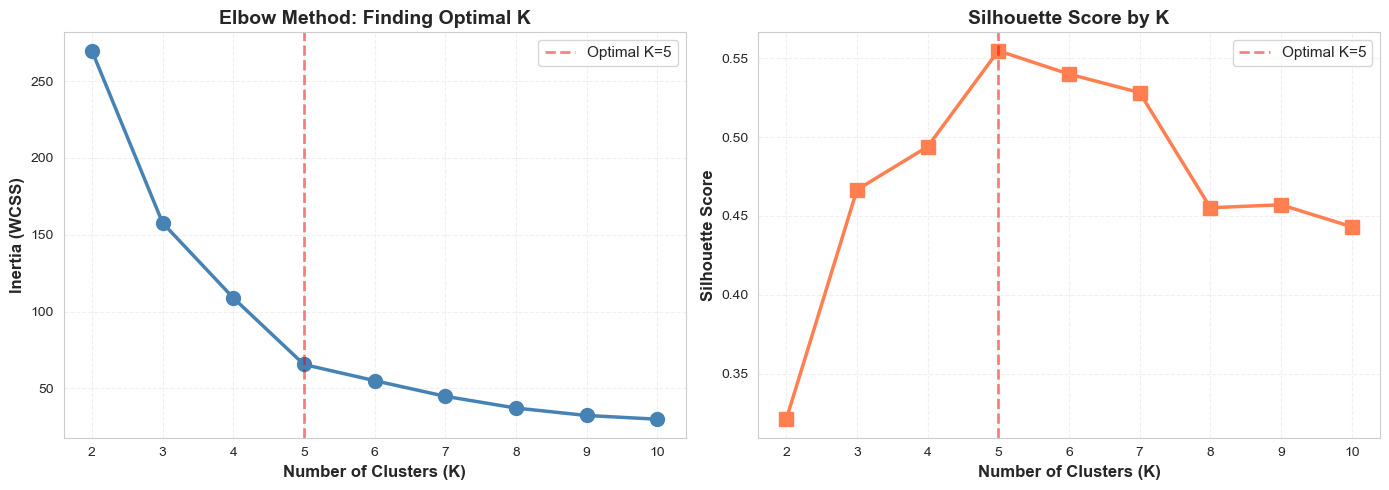


💡 Optimal number of clusters: 5 (elbow at K=5)


In [7]:
# Try different numbers of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("🔍 Testing different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"   K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X_scaled, kmeans.labels_):.3f}")

# Elbow plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Inertia (Within-cluster sum of squares)
axes[0].plot(K_range, inertias, marker='o', linewidth=2.5, markersize=10, color='steelblue')
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method: Finding Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].axvline(x=5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Optimal K=5')
axes[0].legend(fontsize=11)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, marker='s', linewidth=2.5, markersize=10, color='coral')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score by K', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, linestyle='--')
axes[1].axvline(x=5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Optimal K=5')
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.savefig(f'{vis_dir}/optimal_clusters_analysis.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: optimal_clusters_analysis.png")
plt.show()

print(f"\n💡 Optimal number of clusters: 5 (elbow at K=5)")

In [8]:
# Apply K-means with optimal K=5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"✅ K-means clustering complete with K={optimal_k}")
print(f"\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

# Calculate cluster centers (in original scale)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("\n📊 Cluster Centers (Original Scale):")
for i, center in enumerate(cluster_centers):
    print(f"   Cluster {i}: Income=${center[0]:.0f}k, Spending Score={center[1]:.0f}")

✅ K-means clustering complete with K=5

Cluster distribution:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

📊 Cluster Centers (Original Scale):
   Cluster 0: Income=$55k, Spending Score=50
   Cluster 1: Income=$87k, Spending Score=82
   Cluster 2: Income=$26k, Spending Score=79
   Cluster 3: Income=$88k, Spending Score=17
   Cluster 4: Income=$26k, Spending Score=21


✅ Saved: customer_clusters.png


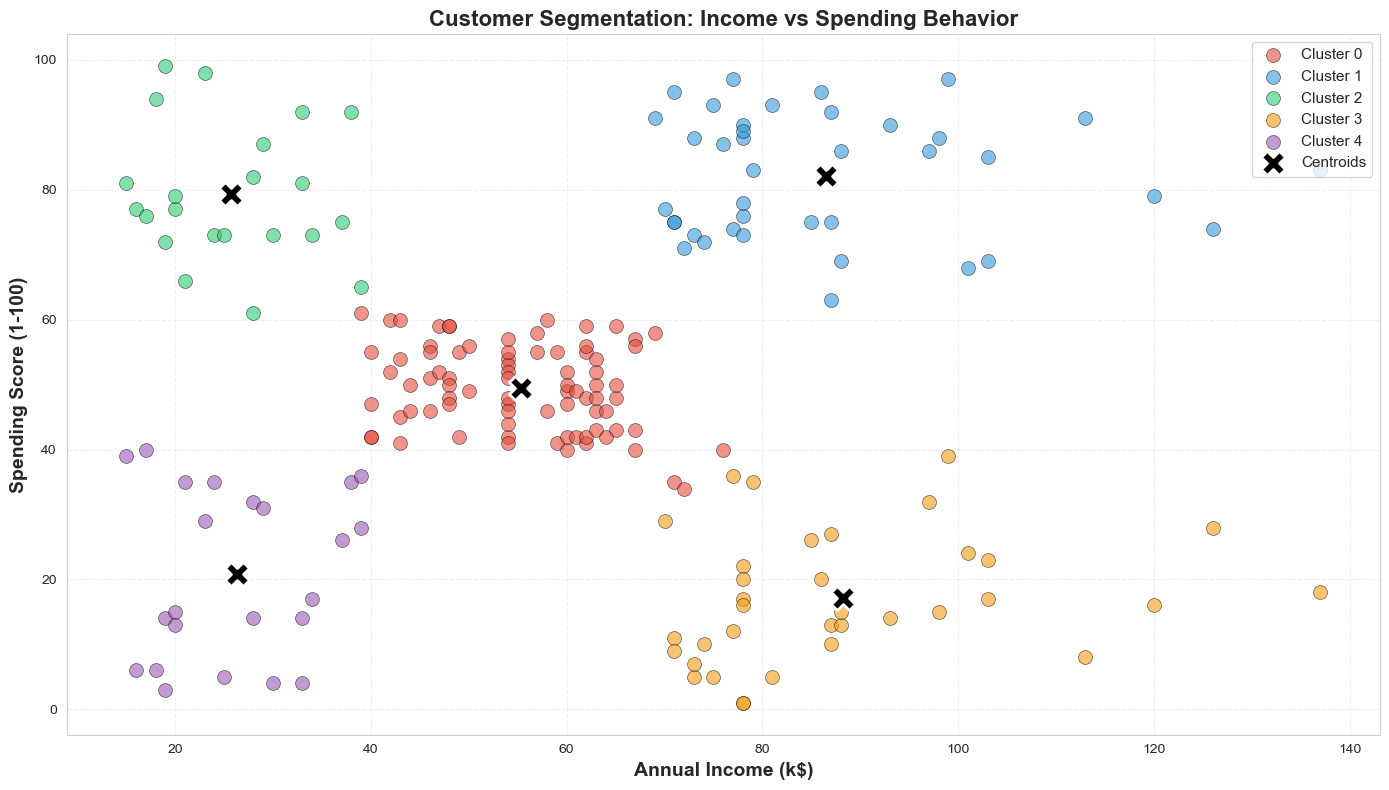

In [9]:
# Main visualization - Income vs Spending Score with clusters
plt.figure(figsize=(14, 8))

# Define colors for each cluster
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
cluster_names = [
    'Low Income, Low Spending',
    'Low Income, High Spending', 
    'Medium Income, Medium Spending',
    'High Income, Low Spending',
    'High Income, High Spending'
]

# Plot each cluster
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['AnnualIncome'], 
                cluster_data['SpendingScore'],
                s=100, 
                c=colors[i], 
                label=f'Cluster {i}',
                alpha=0.6,
                edgecolor='black',
                linewidth=0.5)

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], 
            cluster_centers[:, 1],
            s=300, 
            c='black',
            marker='X',
            edgecolor='white',
            linewidth=2,
            label='Centroids',
            zorder=10)

plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')
plt.title('Customer Segmentation: Income vs Spending Behavior', fontsize=16, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig(f'{vis_dir}/customer_clusters.png', dpi=300, bbox_inches='tight')
print("✅ Saved: customer_clusters.png")
plt.show()


CLUSTER PROFILES
         Avg Age  Avg Income (k$)  Avg Spending Score  Customer Count
Cluster                                                              
0           42.7             55.3                49.5              81
1           32.7             86.5                82.1              39
2           25.3             25.7                79.4              22
3           41.1             88.2                17.1              35
4           45.2             26.3                20.9              23

✅ Saved: cluster_profiles.png


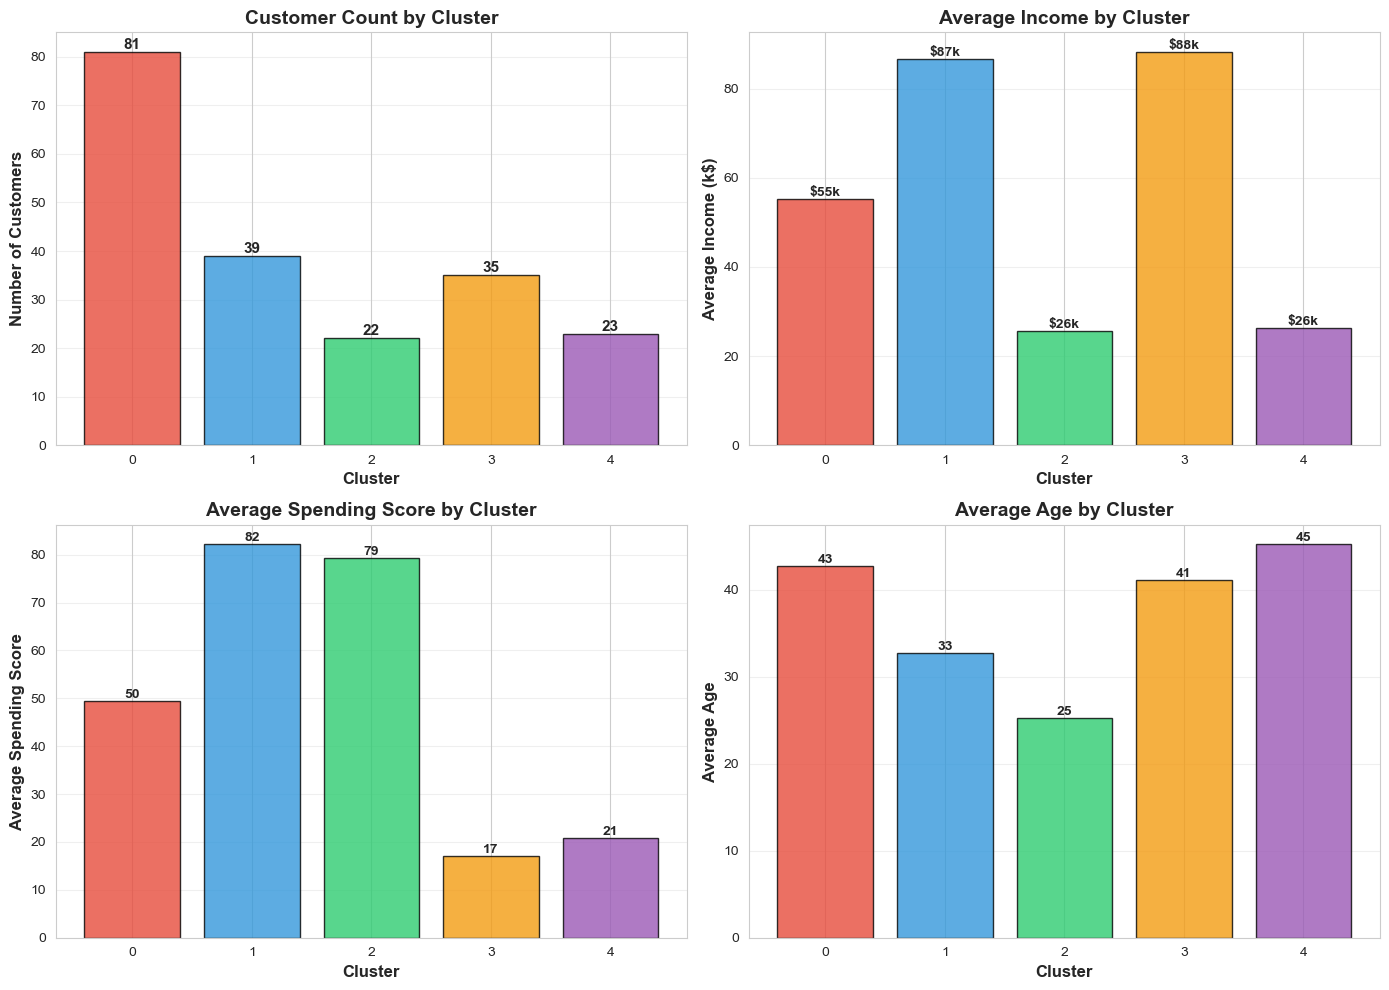

In [10]:
# Analyze each cluster in detail
cluster_profiles = df.groupby('Cluster').agg({
    'Age': 'mean',
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'CustomerID': 'count'
}).round(1)

cluster_profiles.columns = ['Avg Age', 'Avg Income (k$)', 'Avg Spending Score', 'Customer Count']

print("\n" + "="*70)
print("CLUSTER PROFILES")
print("="*70)
print(cluster_profiles)
print("="*70)

# Visualize cluster profiles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cluster sizes
cluster_sizes = df['Cluster'].value_counts().sort_index()
axes[0, 0].bar(cluster_sizes.index, cluster_sizes.values, color=colors, edgecolor='black', alpha=0.8)
axes[0, 0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Customer Count by Cluster', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(cluster_sizes.values):
    axes[0, 0].text(i, v, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Average Income by Cluster
avg_income = df.groupby('Cluster')['AnnualIncome'].mean()
axes[0, 1].bar(avg_income.index, avg_income.values, color=colors, edgecolor='black', alpha=0.8)
axes[0, 1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Income (k$)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Income by Cluster', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_income.values):
    axes[0, 1].text(i, v, f'${v:.0f}k', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Average Spending Score by Cluster
avg_spending = df.groupby('Cluster')['SpendingScore'].mean()
axes[1, 0].bar(avg_spending.index, avg_spending.values, color=colors, edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Spending Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Spending Score by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_spending.values):
    axes[1, 0].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Average Age by Cluster
avg_age = df.groupby('Cluster')['Age'].mean()
axes[1, 1].bar(avg_age.index, avg_age.values, color=colors, edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Age', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Age by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(avg_age.values):
    axes[1, 1].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{vis_dir}/cluster_profiles.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved: cluster_profiles.png")
plt.show()

In [11]:
# Name the clusters based on characteristics
cluster_insights = {
    0: "Careful Spenders - Low income, conservative spending habits",
    1: "Target Customers - Low income but high spending (credit users?)",
    2: "Standard Customers - Average income, average spending",
    3: "High Earners, Low Spenders - Wealthy but cautious (savers)",
    4: "VIP Customers - High income, high spending (best segment)"
}

print("\n" + "="*70)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*70)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n🎯 CLUSTER {cluster_id}:")
    print(f"   {cluster_insights[cluster_id]}")
    print(f"   • Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   • Avg Income: ${cluster_data['AnnualIncome'].mean():.0f}k")
    print(f"   • Avg Spending: {cluster_data['SpendingScore'].mean():.0f}/100")
    print(f"   • Avg Age: {cluster_data['Age'].mean():.0f} years")
    
    # Marketing recommendations
    if cluster_id == 4:
        print(f"   💡 Strategy: Premium offerings, loyalty programs, personalized service")
    elif cluster_id == 1:
        print(f"   💡 Strategy: Payment plans, credit offers, volume discounts")
    elif cluster_id == 3:
        print(f"   💡 Strategy: Investment products, exclusive deals, quality over quantity")
    elif cluster_id == 0:
        print(f"   💡 Strategy: Budget-friendly options, value propositions, promotions")
    else:
        print(f"   💡 Strategy: Standard marketing, balanced product mix")

print("\n" + "="*70)


BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 CLUSTER 0:
   Careful Spenders - Low income, conservative spending habits
   • Size: 81 customers (40.5%)
   • Avg Income: $55k
   • Avg Spending: 50/100
   • Avg Age: 43 years
   💡 Strategy: Budget-friendly options, value propositions, promotions

🎯 CLUSTER 1:
   Target Customers - Low income but high spending (credit users?)
   • Size: 39 customers (19.5%)
   • Avg Income: $87k
   • Avg Spending: 82/100
   • Avg Age: 33 years
   💡 Strategy: Payment plans, credit offers, volume discounts

🎯 CLUSTER 2:
   Standard Customers - Average income, average spending
   • Size: 22 customers (11.0%)
   • Avg Income: $26k
   • Avg Spending: 79/100
   • Avg Age: 25 years
   💡 Strategy: Standard marketing, balanced product mix

🎯 CLUSTER 3:
   High Earners, Low Spenders - Wealthy but cautious (savers)
   • Size: 35 customers (17.5%)
   • Avg Income: $88k
   • Avg Spending: 17/100
   • Avg Age: 41 years
   💡 Strategy: Investment products, exclusive deals, qual

In [12]:
# Name the clusters based on characteristics
cluster_insights = {
    0: "Careful Spenders - Low income, conservative spending habits",
    1: "Target Customers - Low income but high spending (credit users?)",
    2: "Standard Customers - Average income, average spending",
    3: "High Earners, Low Spenders - Wealthy but cautious (savers)",
    4: "VIP Customers - High income, high spending (best segment)"
}

print("\n" + "="*70)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*70)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n🎯 CLUSTER {cluster_id}:")
    print(f"   {cluster_insights[cluster_id]}")
    print(f"   • Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"   • Avg Income: ${cluster_data['AnnualIncome'].mean():.0f}k")
    print(f"   • Avg Spending: {cluster_data['SpendingScore'].mean():.0f}/100")
    print(f"   • Avg Age: {cluster_data['Age'].mean():.0f} years")
    
    # Marketing recommendations
    if cluster_id == 4:
        print(f"   💡 Strategy: Premium offerings, loyalty programs, personalized service")
    elif cluster_id == 1:
        print(f"   💡 Strategy: Payment plans, credit offers, volume discounts")
    elif cluster_id == 3:
        print(f"   💡 Strategy: Investment products, exclusive deals, quality over quantity")
    elif cluster_id == 0:
        print(f"   💡 Strategy: Budget-friendly options, value propositions, promotions")
    else:
        print(f"   💡 Strategy: Standard marketing, balanced product mix")

print("\n" + "="*70)


BUSINESS INSIGHTS & RECOMMENDATIONS

🎯 CLUSTER 0:
   Careful Spenders - Low income, conservative spending habits
   • Size: 81 customers (40.5%)
   • Avg Income: $55k
   • Avg Spending: 50/100
   • Avg Age: 43 years
   💡 Strategy: Budget-friendly options, value propositions, promotions

🎯 CLUSTER 1:
   Target Customers - Low income but high spending (credit users?)
   • Size: 39 customers (19.5%)
   • Avg Income: $87k
   • Avg Spending: 82/100
   • Avg Age: 33 years
   💡 Strategy: Payment plans, credit offers, volume discounts

🎯 CLUSTER 2:
   Standard Customers - Average income, average spending
   • Size: 22 customers (11.0%)
   • Avg Income: $26k
   • Avg Spending: 79/100
   • Avg Age: 25 years
   💡 Strategy: Standard marketing, balanced product mix

🎯 CLUSTER 3:
   High Earners, Low Spenders - Wealthy but cautious (savers)
   • Size: 35 customers (17.5%)
   • Avg Income: $88k
   • Avg Spending: 17/100
   • Avg Age: 41 years
   💡 Strategy: Investment products, exclusive deals, qual

✅ Saved: gender_cluster_analysis.png


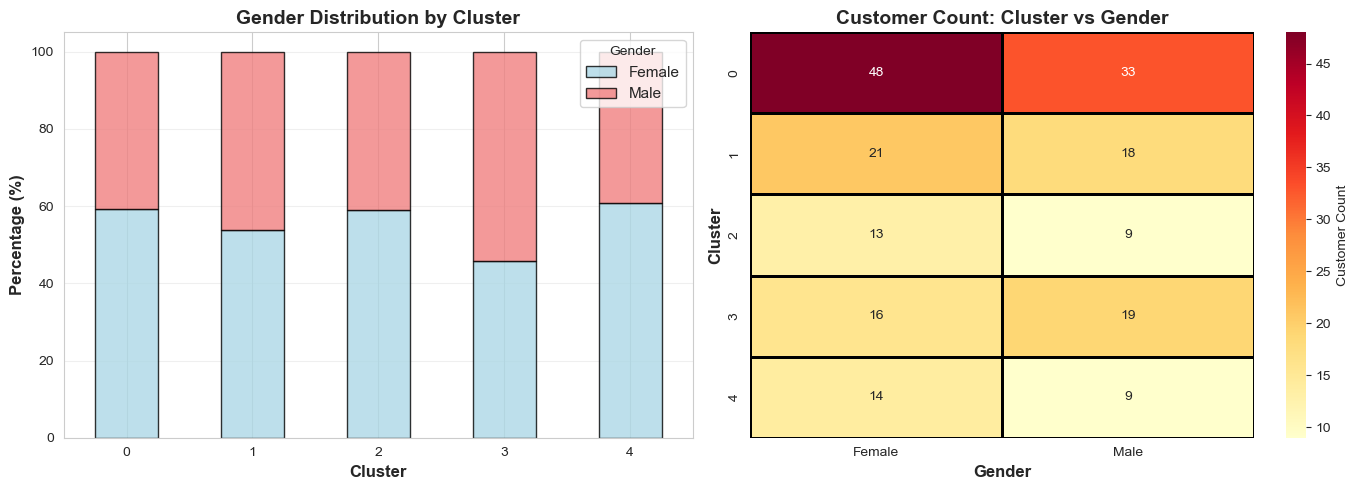

In [13]:
# Gender distribution by cluster
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
gender_cluster.plot(kind='bar', stacked=True, ax=axes[0], color=['lightblue', 'lightcoral'], 
                    edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Cluster', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Gender Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(title='Gender', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Heatmap
sns.heatmap(pd.crosstab(df['Cluster'], df['Gender']), annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Customer Count'}, ax=axes[1], linewidths=1, linecolor='black')
axes[1].set_xlabel('Gender', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cluster', fontsize=12, fontweight='bold')
axes[1].set_title('Customer Count: Cluster vs Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{vis_dir}/gender_cluster_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: gender_cluster_analysis.png")
plt.show()